<a href="https://colab.research.google.com/github/seema469/AAI_511_DeepLearning/blob/main/MIDI_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import mido
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def extract_midi_info(midi_file):
    """
    Extract basic information from a MIDI file.
    """
    try:
        midi_data = mido.MidiFile(midi_file)
        info = {
            'filename': os.path.basename(midi_file),
            'filepath': midi_file,
            'length': midi_data.length,
            'tracks': len(midi_data.tracks),
            'ticks_per_beat': midi_data.ticks_per_beat
        }
        return info
    except Exception as e:
        print(f"Error processing {midi_file}: {e}")
        return None

def read_midi_files(directory):
    """
    Recursively read all MIDI files in a directory and its subdirectories and extract information.
    """
    midi_info_list = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.mid') or file.endswith('.midi'):
                print(root,file)
                midi_file = os.path.join(root, file)
                midi_info = extract_midi_info(midi_file)
                if midi_info:
                    midi_info_list.append(midi_info)
    return pd.DataFrame(midi_info_list)

# Example usage:
midi_directory = r"archive\\midiclassics"
midi_df = read_midi_files(midi_directory)

archive\\midiclassics Bartok Suite 1mov.mid
archive\\midiclassics Bartok Suite 2mov.mid
archive\\midiclassics Bizet Carmen Prelude.mid
archive\\midiclassics Bizet Symphony in C 1mov.mid
archive\\midiclassics Bizet Symphony in C 2mov.mid
archive\\midiclassics Bizet Symphony in C 3mov.mid
archive\\midiclassics Bizet Symphony in C 4mov.mid
archive\\midiclassics Buxethude Buxwv136 Prelude.mid
archive\\midiclassics Buxethude Buxwv138 Prelude.mid
Error processing archive\\midiclassics\Buxethude Buxwv138 Prelude.mid: list index out of range
archive\\midiclassics Buxethude Buxwv145 Prelude.mid
archive\\midiclassics Buxethude Buxwv153 Prelude.mid
archive\\midiclassics Buxethude Buxwv155 Toccata.mid
archive\\midiclassics Buxethude Buxwv156 Toccata.mid
archive\\midiclassics Buxethude Buxwv157 Tocatta and Fugue.mid
archive\\midiclassics Buxethude Buxwv157 Toccata.mid
archive\\midiclassics Buxethude Buxwv158 Preambulum.mid
archive\\midiclassics Buxethude Buxwv160 Ciacona.mid
archive\\midiclassics B

In [ ]:
midi_df.head()

,filename,filepath,length,tracks,ticks_per_beat
0,Bartok Suite 1mov.mid,archive\\midiclassics\Bartok Suite 1mov.mid,120.995515,1,1024
1,Bartok Suite 2mov.mid,archive\\midiclassics\Bartok Suite 2mov.mid,105.217808,1,1024
2,Bizet Carmen Prelude.mid,archive\\midiclassics\Bizet Carmen Prelude.mid,195.434774,28,120
3,Bizet Symphony in C 1mov.mid,archive\\midiclassics\Bizet Symphony in C 1mov...,640.325161,20,120
4,Bizet Symphony in C 2mov.mid,archive\\midiclassics\Bizet Symphony in C 2mov...,561.271014,20,120


In [ ]:
# Display basic statistics
print(midi_df.describe())

            length       tracks  ticks_per_beat
count  3830.000000  3830.000000     3830.000000
mean    235.022634     7.983812      390.268407
std     266.670424     6.399411      312.856318
min      13.125000     1.000000       24.000000
25%      73.934092     4.000000      120.000000
50%     152.885402     5.000000      240.000000
75%     290.000000    11.000000      480.000000
max    5209.310787   140.000000     1024.000000


            length       tracks  ticks_per_beat
count  3830.000000  3830.000000     3830.000000
mean    235.022634     7.983812      390.268407
std     266.670424     6.399411      312.856318
min      13.125000     1.000000       24.000000
25%      73.934092     4.000000      120.000000
50%     152.885402     5.000000      240.000000
75%     290.000000    11.000000      480.000000
max    5209.310787   140.000000     1024.000000


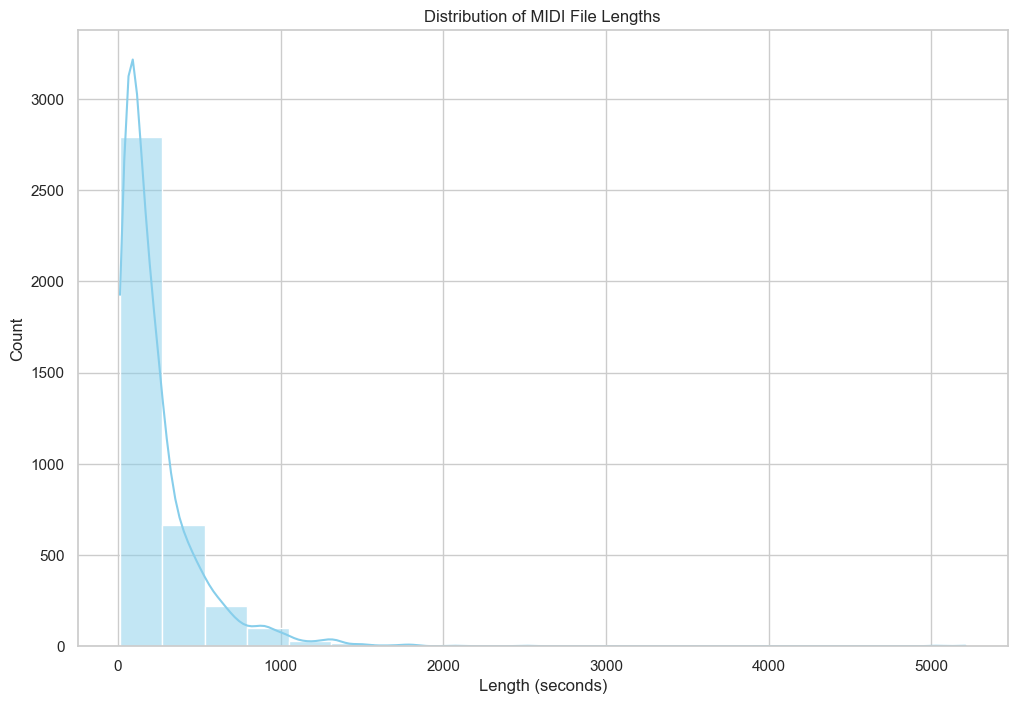

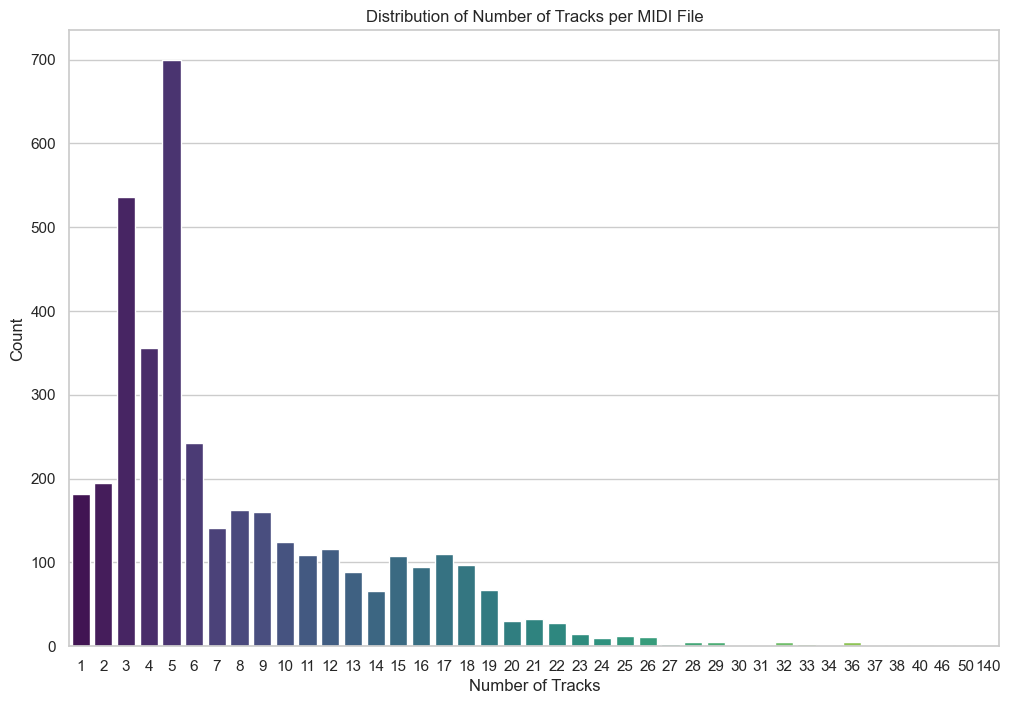

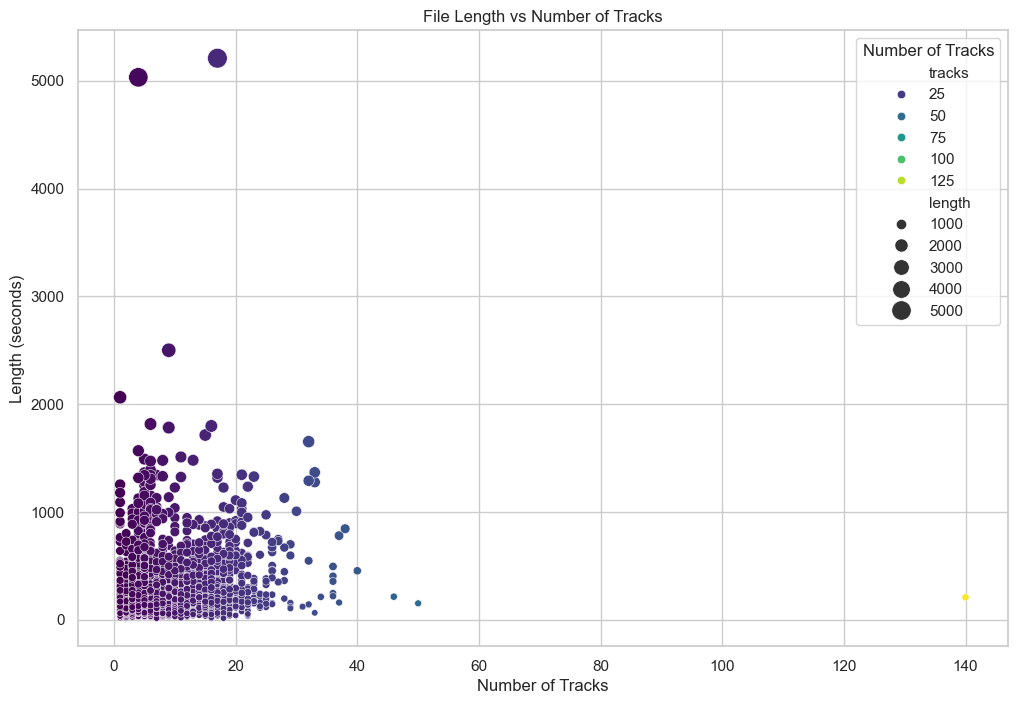

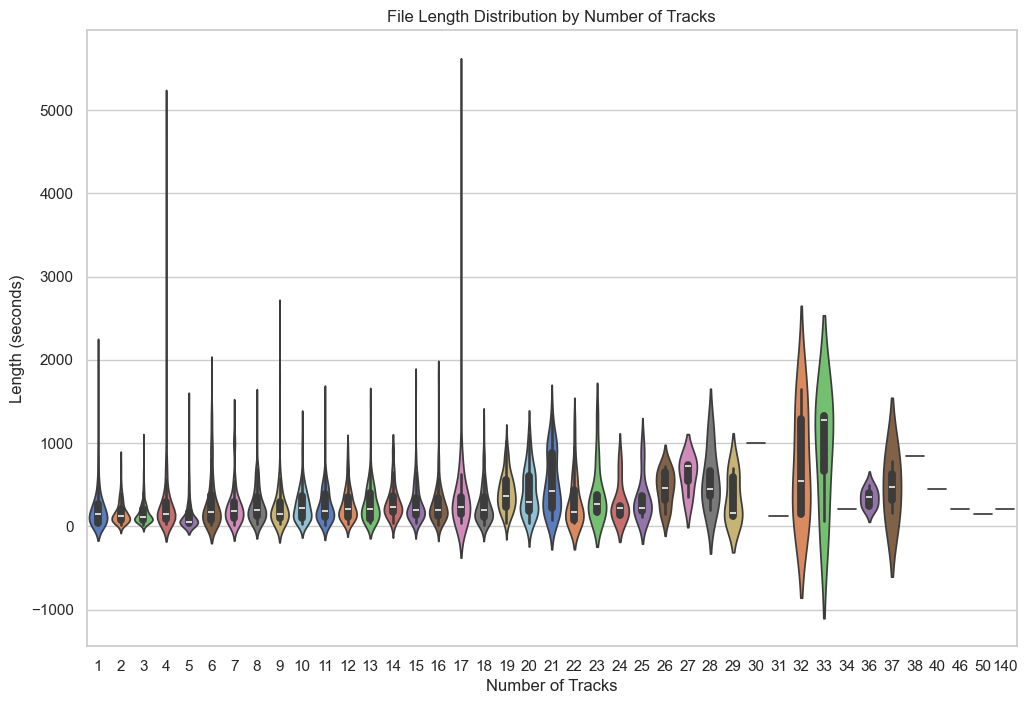

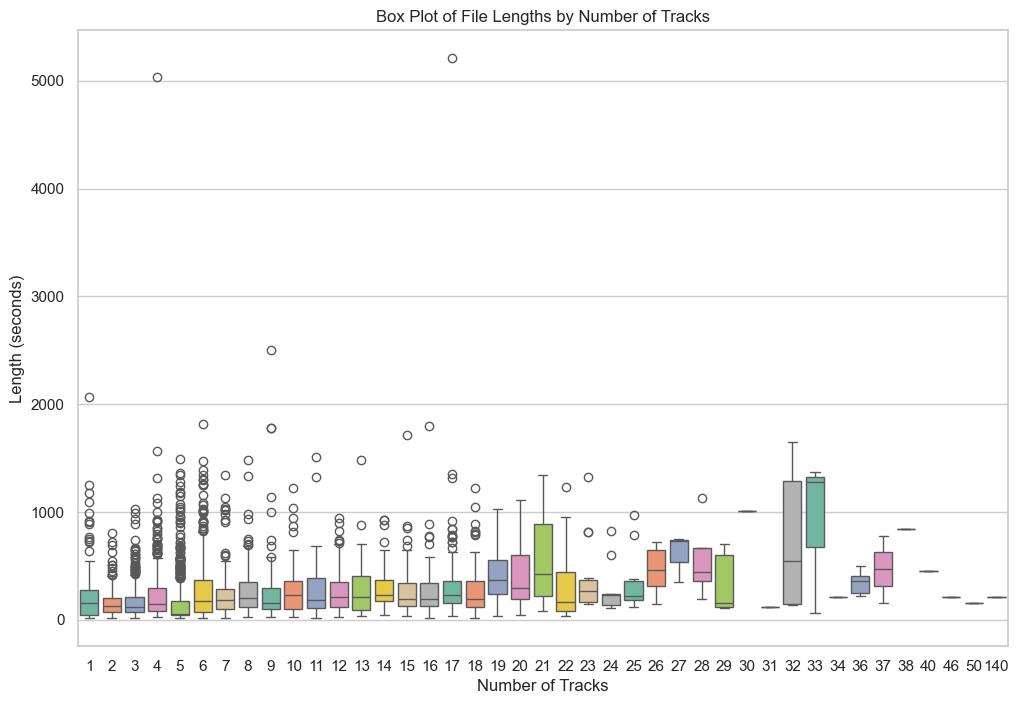

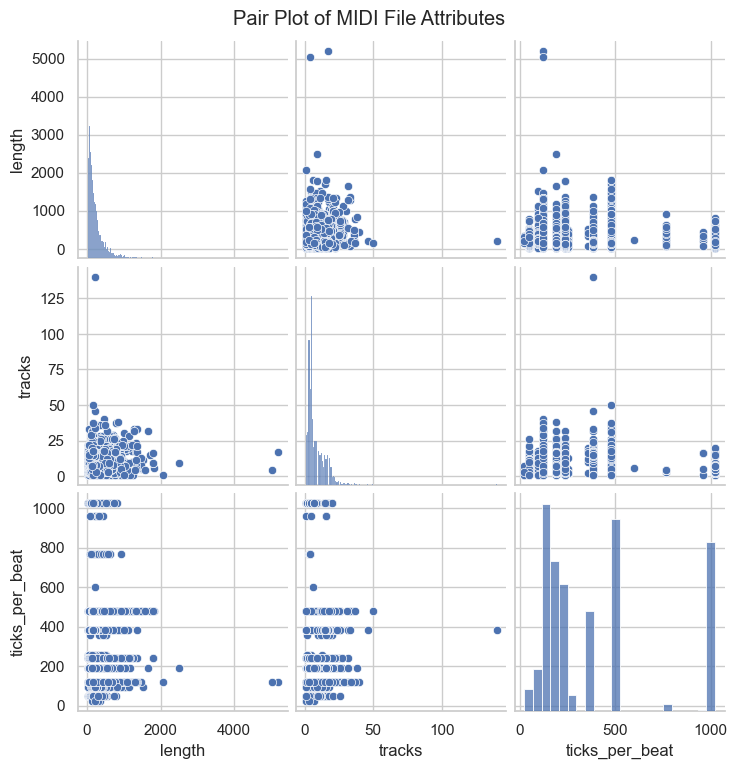

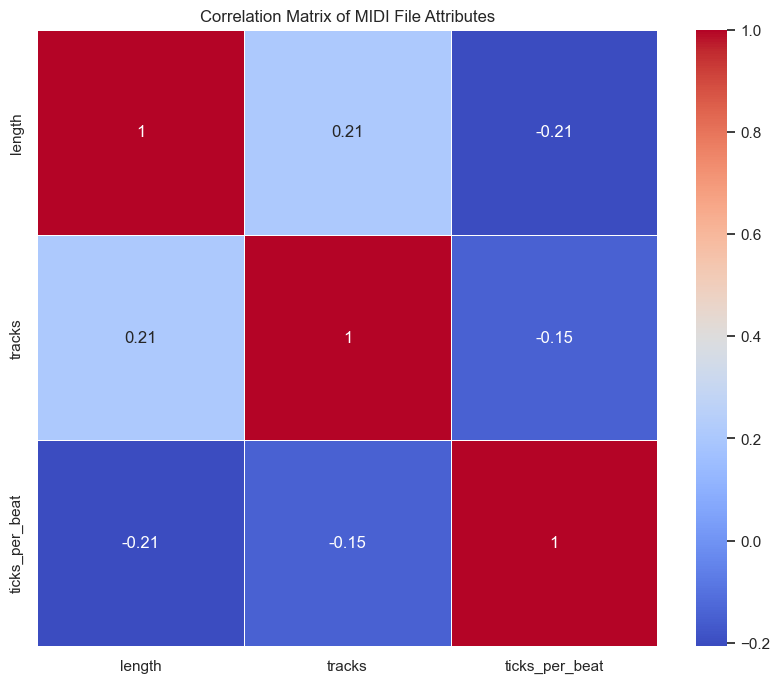

In [ ]:
# Set a visual style
sns.set(style="whitegrid")

# Display basic statistics
print(midi_df.describe())

# Plot distribution of MIDI file lengths
plt.figure(figsize=(12, 8))
sns.histplot(midi_df['length'], bins=20, kde=True, color="skyblue")
plt.title('Distribution of MIDI File Lengths')
plt.xlabel('Length (seconds)')
plt.ylabel('Count')
plt.show()

# Plot distribution of the number of tracks per MIDI file
plt.figure(figsize=(12, 8))
sns.countplot(data=midi_df, x='tracks', palette="viridis")
plt.title('Distribution of Number of Tracks per MIDI File')
plt.xlabel('Number of Tracks')
plt.ylabel('Count')
plt.show()

# Scatter plot of file length vs number of tracks
plt.figure(figsize=(12, 8))
sns.scatterplot(data=midi_df, x='tracks', y='length', hue='tracks', palette="viridis", size='length', sizes=(20, 200))
plt.title('File Length vs Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Length (seconds)')
plt.legend(title='Number of Tracks')
plt.show()

# Violin plot of file lengths grouped by number of tracks
plt.figure(figsize=(12, 8))
sns.violinplot(data=midi_df, x='tracks', y='length', palette="muted")
plt.title('File Length Distribution by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Length (seconds)')
plt.show()

# Box plot of file lengths
plt.figure(figsize=(12, 8))
sns.boxplot(data=midi_df, x='tracks', y='length', palette="Set2")
plt.title('Box Plot of File Lengths by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Length (seconds)')
plt.show()

# Pair plot to see the relationships between all variables
sns.pairplot(midi_df, palette="husl")
plt.suptitle('Pair Plot of MIDI File Attributes', y=1.02)
plt.show()

# Heatmap of correlations between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = midi_df[[ 'length','tracks','ticks_per_beat']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of MIDI File Attributes')
plt.show()